# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
files.upload()  # upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yaswanthkancharla","key":"743b06db12fc339b072c8230b4a5e855"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d kutaykutlu/drowsiness-detection

Dataset URL: https://www.kaggle.com/datasets/kutaykutlu/drowsiness-detection
License(s): unknown


In [5]:
!unzip drowsiness-detection.zip -d drowsiness_dataset

Streaming output truncated to the last 5000 lines.
  inflating: drowsiness_dataset/open_eye/s0024_00466_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00467_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00468_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00469_0_1_1_2_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00470_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00471_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00472_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00473_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00474_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00475_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00476_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00477_0_1_1_0_0_01.png  
  inflating: drowsiness_dataset/open_eye/s0024_00478_0_1_1_0_0_01.png  
  inflating: 

In [6]:
# Define Image Data Generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    'drowsiness_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Load Validation Data
val_generator = train_datagen.flow_from_directory(
    'drowsiness_dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


In [7]:
def create_model():
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Convolutional Layer 2
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Flatten Layer
        Flatten(),

        # Fully Connected Layer with Dropout
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        BatchNormalization(),

        # Output Layer (Binary Classification)
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [8]:
# Create Model
model = create_model()

# Train Model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9069 - loss: 0.9823 - val_accuracy: 0.8632 - val_loss: 0.6585
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.9505 - loss: 0.4586 - val_accuracy: 0.9173 - val_loss: 0.4645
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.9617 - loss: 0.3798 - val_accuracy: 0.9123 - val_loss: 0.4900
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9691 - loss: 0.3307 - val_accuracy: 0.8724 - val_loss: 0.6485
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9686 - loss: 0.3236 - val_accuracy: 0.9287 - val_loss: 0.3621
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - accuracy: 0.9721 - loss: 0.2878 - val_accuracy: 0.9519 - val_loss: 0.3337
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.9707 - loss: 0.3044 - val_accuracy: 0.8953 - val_loss: 0.4673
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.9720 - loss: 0.29

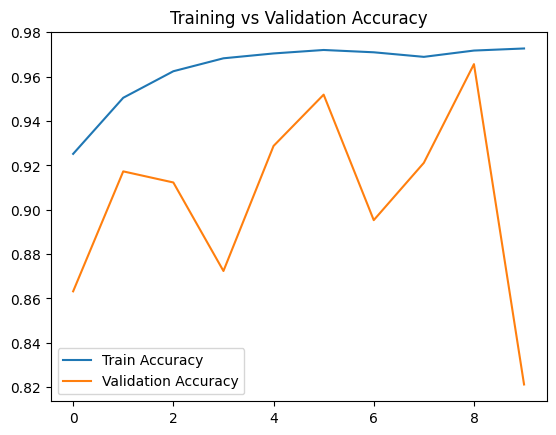

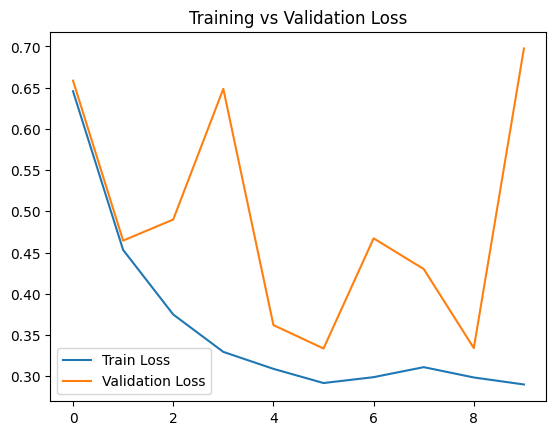

In [9]:
# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [10]:
# Get True Labels & Predictions
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Generate Classification Report
print(classification_report(y_true, y_pred, target_names=['Closed_Eyes', 'Open_Eyes']))


300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

 Closed_Eyes       0.50      0.41      0.45      4800
   Open_Eyes       0.50      0.58      0.54      4800

    accuracy                           0.50      9600
   macro avg       0.50      0.50      0.49      9600
weighted avg       0.50      0.50      0.49      9600



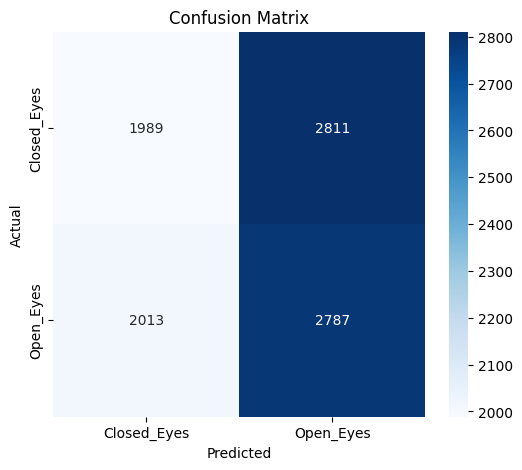

In [11]:
# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Closed_Eyes', 'Open_Eyes'], yticklabels=['Closed_Eyes', 'Open_Eyes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
